<a href="https://colab.research.google.com/github/Rama-Pathak/Codsoft/blob/main/Titanic_Survival_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Data Collection and preprocessing






In [ ]:
# import the dataset
dataset=pd.read_csv("Titanic-Dataset.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# information of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# check for the null values in the dataset
dataset.isnull().sum() # there are null values in the age, cabin, Embarked column of the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Drop columns that won't be used for prediction
dataset.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [ ]:
# Fill missing 'Age' values with mean
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
# Fill missing 'Embarked' values with mode (most common value)
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

In [ ]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Convert categorical variables into dummy/indicator variables
dataset1 = pd.get_dummies(dataset, columns=['Sex', 'Embarked'], drop_first=True)


In [ ]:
# top 5 entries
dataset1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
# Correlation Matrix
corr_matrix = dataset1.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.042939,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,0.221009,0.074053
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,-0.013855,-0.019336
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.162184
Sex_male,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.119224
Embarked_Q,-0.033606,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.499421
Embarked_S,0.022204,-0.149683,0.074053,-0.019336,0.068734,0.060814,-0.162184,0.119224,-0.499421,1.000000


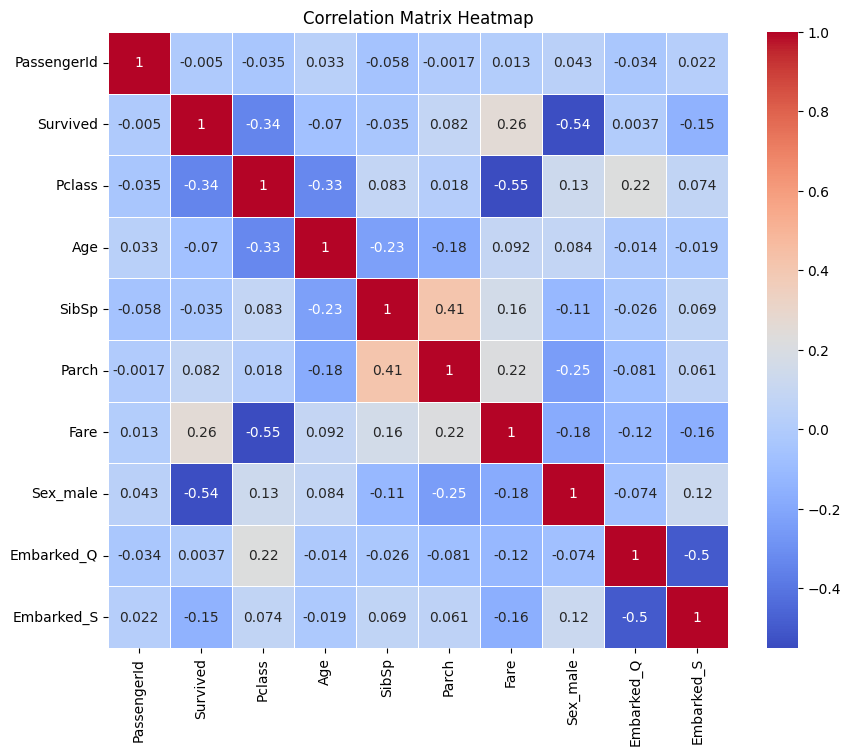

In [ ]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# the values of survived
dataset['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<ipython-input-12-bf6627f9fb3a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  br =sns.countplot(data=dataset, x='Survived', palette=['red', 'black'])


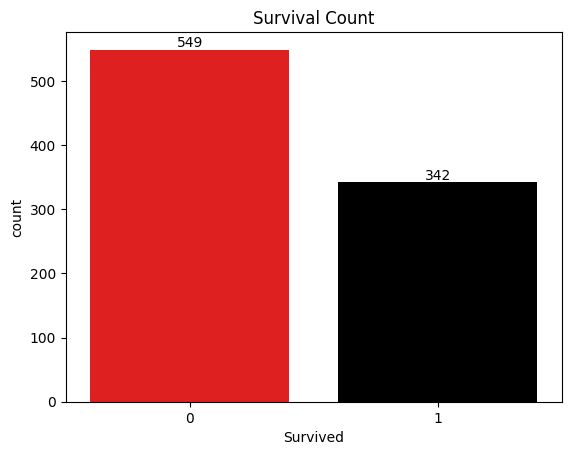

In [ ]:
# Survived Countplot
br =sns.countplot(data=dataset, x='Survived', palette=['red', 'black'])
for container in br.containers:
    br.bar_label(container, fmt='%d')
plt.title("Survival Count")
plt.show()

In [ ]:
# grouping survived by Gender
dataset.groupby(['Survived', 'Sex']).size().reset_index(name='Count')

,Survived,Sex,Count
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


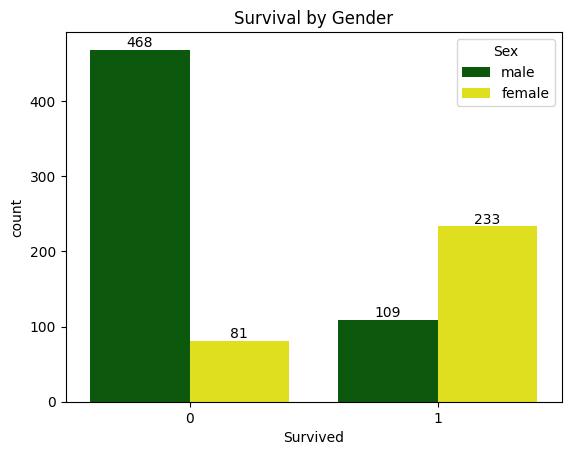

In [ ]:
# Survived by Gender
ax=sns.countplot(data=dataset, x='Survived', hue='Sex',palette=['darkgreen','yellow'])
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.title("Survival by Gender")
plt.show()

In [ ]:
# grouping survived by pclass
dataset.groupby(['Survived', 'Pclass']).size().reset_index(name='Count')

,Survived,Pclass,Count
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87
5,1,3,119


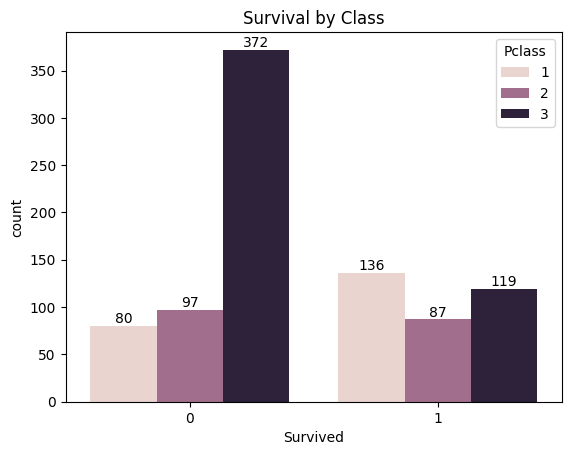

In [ ]:
# Survived by Pclass
cr=sns.countplot(data=dataset, x='Survived', hue='Pclass')
for container in cr.containers:
    cr.bar_label(container, fmt='%d')
plt.title("Survival by Class")
plt.show()

In [ ]:
# the values of different age
dataset['Age'].value_counts().head(5)

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
Name: count, dtype: int64

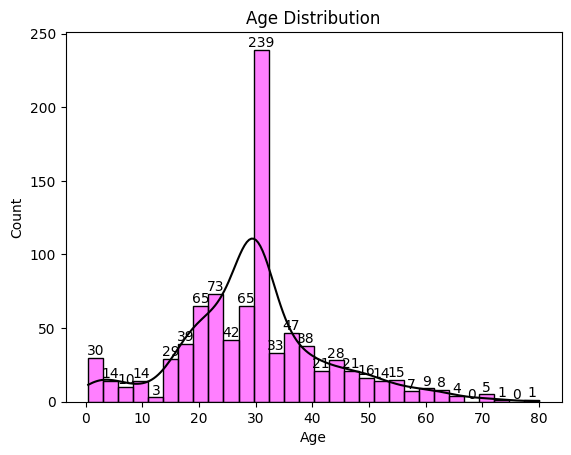

In [ ]:
# Age Distribution
dr=sns.histplot(data=dataset, x='Age', bins=30, kde=True,color='magenta')
dr.lines[0].set_color('black')
for container in dr.containers:
    dr.bar_label(container, fmt='%d')
plt.title("Age Distribution")
plt.show()

In [ ]:
# grouping age by survived
dataset.groupby(['Age', 'Survived']).size().reset_index(name='Count')

,Age,Survived,Count
0,0.42,1,1
1,0.67,1,1
2,0.75,1,2
3,0.83,1,2
4,0.92,1,1
...,...,...,...
139,70.00,0,2
140,70.50,0,1
141,71.00,0,2
142,74.00,0,1


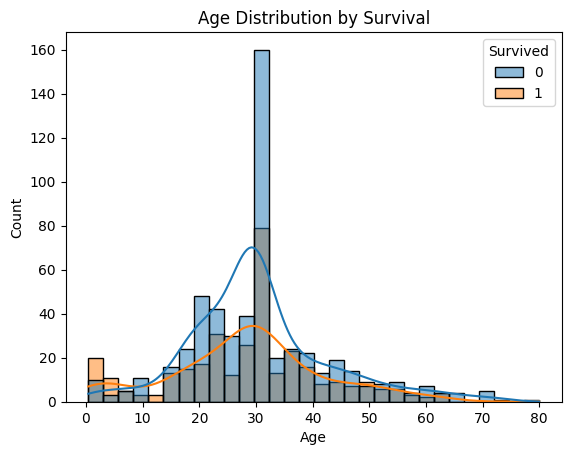

In [ ]:
# Age Distribution by Survival
sns.histplot(data=dataset, x='Age', bins=30, hue='Survived', kde=True, palette=['crimson',''])
plt.title("Age Distribution by Survival")
plt.show()

In [ ]:
# count the values of different fares
fare_counts=dataset['Fare'].value_counts()
fare_counts

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [ ]:
# Get the top 5 highest values
top_5_fares = fare_counts.head(5)

# Display the top 5 values
print(top_5_fares)

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
Name: count, dtype: int64


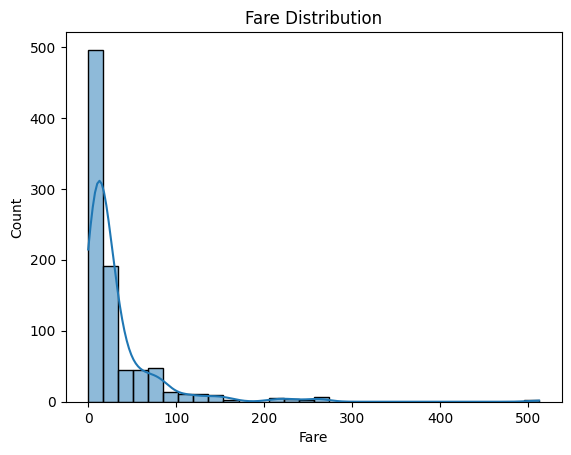

In [ ]:
# Fare Distribution
sns.histplot(data=dataset, x='Fare', bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

In [ ]:
# grouping Pclass by Fare
dataset.groupby(['Pclass', 'Fare']).size().reset_index(name='Count')

,Pclass,Fare,Count
0,1,0.0000,5
1,1,5.0000,1
2,1,25.5875,1
3,1,25.9250,1
4,1,25.9292,2
...,...,...,...
250,3,34.3750,4
251,3,39.6875,6
252,3,46.9000,6
253,3,56.4958,7


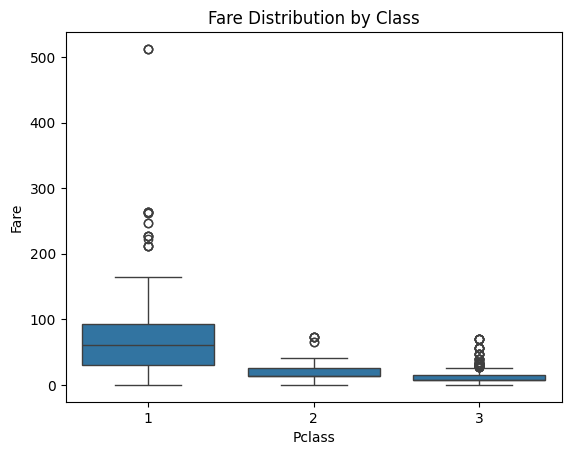

In [ ]:
# Fare Distribution by Class
sns.boxplot(data=dataset, x='Pclass', y='Fare')
plt.title("Fare Distribution by Class")
plt.show()

In [ ]:
# the values of embraked
dataset['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

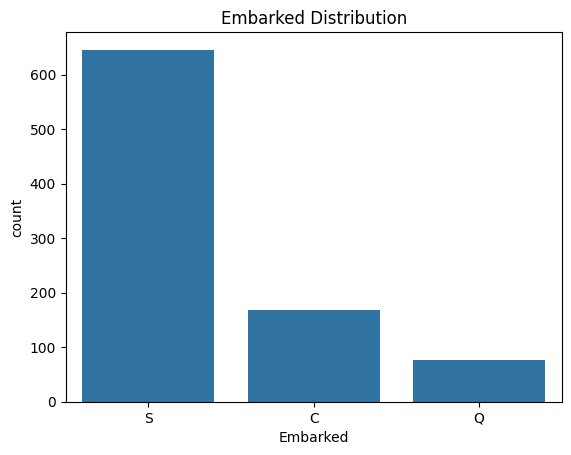

In [ ]:
# Embarked Distribution
sns.countplot(data=dataset, x='Embarked')
plt.title("Embarked Distribution")
plt.show()

In [ ]:
# grouping Embarked by Survived
dataset.groupby(['Embarked', 'Survived']).size().reset_index(name='Count')

,Embarked,Survived,Count
0,C,0,75
1,C,1,93
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,219


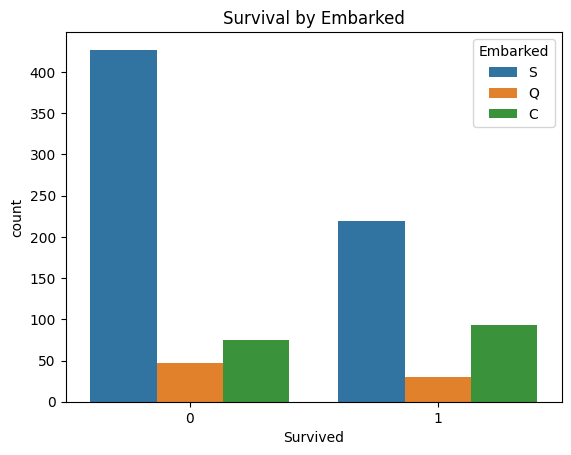

In [ ]:
# Survival by Embarked
sns.countplot(data=dataset, x='Survived', hue='Embarked')
plt.title("Survival by Embarked")
plt.show()

In [ ]:
# specifying the value of X and Y
X= dataset1.drop(columns= ['PassengerId','Fare'],axis=1)
Y=dataset1['Fare']

In [ ]:
# splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=1/3, random_state=42)
print(X.shape, X_test.shape, X_train.shape)

(891, 8) (297, 8) (594, 8)


In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([ 36.3097095 ,  29.51882442,  -1.82891675,  46.88215747,
        27.17438159,  67.25973606,   9.40121837,  10.06900713,
         9.89190048,  88.80605752,  66.9229831 ,  -2.68856121,
        27.0535947 ,  14.90388622,  29.33973183,  78.26571717,
        71.6138158 ,   9.40121837,  29.6620985 ,  60.687473  ,
        -1.97219083,  66.02303905,   9.90430083,  -1.82891675,
        -2.17632478,  37.45683498,  78.02919081,  34.38874972,
        37.67174609,  -1.2727716 ,  -1.79309823,   3.91952036,
        78.39815316,  -1.22617592,   3.11264558,  20.88866669,
        66.23795016,   9.40121837,  84.20745015,  -2.17632478,
        41.63165942,   3.72604148,  -2.17632478,   3.58114422,
        25.96455321,  36.13506997,  -1.79309823,  -1.93637231,
        -1.97219083,  98.68004929,  44.02186908,  82.85357538,
        45.92322142,  94.01978172,   2.31671888,  88.84187604,
        29.4830059 ,  94.13887568,  35.1956245 ,   9.78444492,
        -1.86473527,  46.63142784,  41.32367904,  61.30

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1075.0176951382248
R^2 Score: 0.486180844408576


In [ ]:
# For visualization, we'll flatten the arrays if they are not already 1D
if len(X_train.shape) > 1 and X_train.shape[1] == 1:
    X_train = X_train.flatten()
if len(X_test.shape) > 1 and X_test.shape[1] == 1:
    X_test = X_test.flatten()

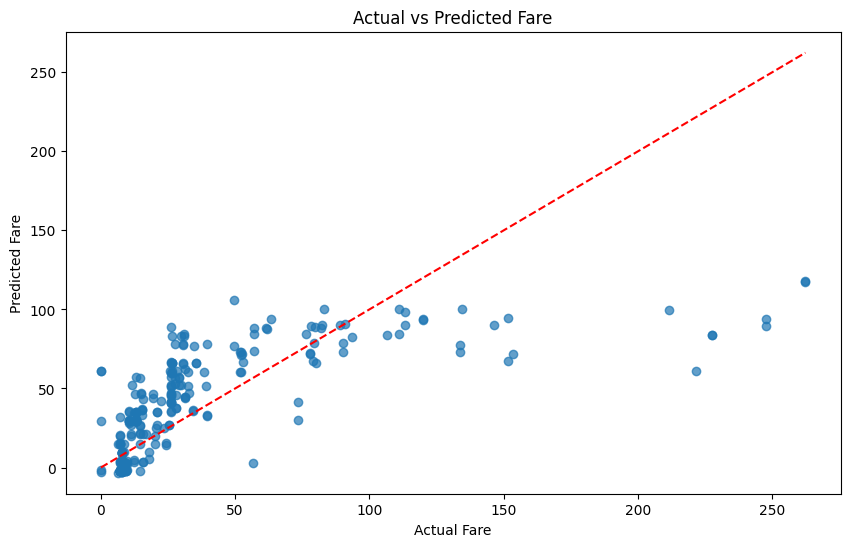

In [ ]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, max(y_test)], [0, max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.show()

In [ ]:
# Define features and target variable
C = dataset1.drop(['Survived', 'Sex_male', 'Parch', 'SibSp', 'Age', 'Embarked_Q'], axis=1)  # Drop irrelevant or less significant columns
D = dataset1['Survived']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(C, D, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.7039106145251397
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       105
           1       0.70      0.50      0.58        74

    accuracy                           0.70       179
   macro avg       0.70      0.67      0.68       179
weighted avg       0.70      0.70      0.69       179

Confusion Matrix:
[[89 16]
 [37 37]]


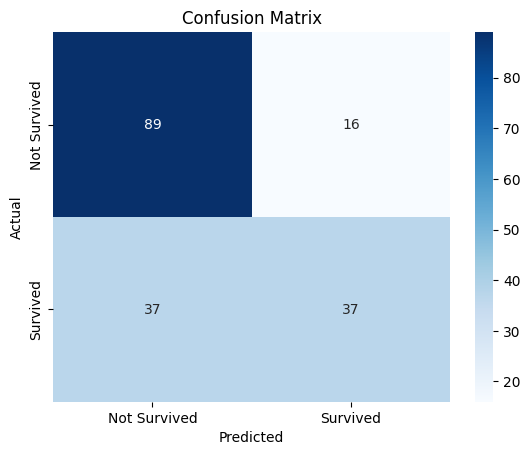

In [ ]:
# Visualising the Confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Initialize and fit the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
print('K-Nearest Neighbors')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
conf_matrix1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

K-Nearest Neighbors
Accuracy: 0.6815642458100558
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       105
           1       0.68      0.43      0.53        74

    accuracy                           0.68       179
   macro avg       0.68      0.64      0.64       179
weighted avg       0.68      0.68      0.66       179

Confusion Matrix:
[[90 15]
 [42 32]]


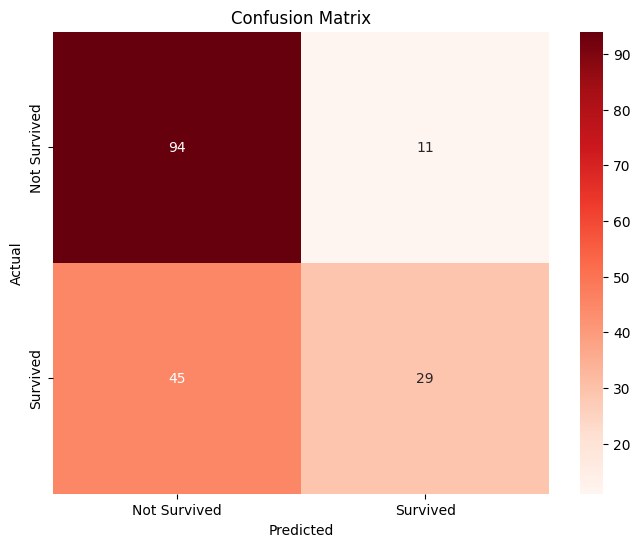

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

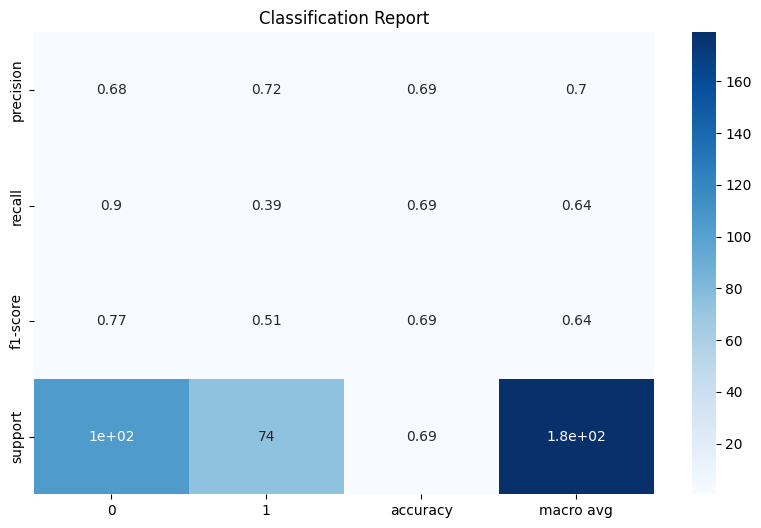

In [ ]:
# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [ ]:
# Optionally, include accuracy in a plot
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, f'Accuracy: {accuracy:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=20, bbox=dict(facecolor='blue', alpha=0.5))
plt.axis('off')
plt.title('Model Accuracy')
plt.show()

NameError: name 'accuracy' is not defined

<Figure size 600x400 with 0 Axes>

In [ ]:
from sklearn.svm import SVC

# Initialize and fit the model
model = SVC()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Support Vector Machine')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
conf_matrix2=confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Support Vector Machine
Accuracy: 0.5977653631284916
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.98      0.74       105
           1       0.67      0.05      0.10        74

    accuracy                           0.60       179
   macro avg       0.63      0.52      0.42       179
weighted avg       0.62      0.60      0.48       179

Confusion Matrix:
[[103   2]
 [ 70   4]]


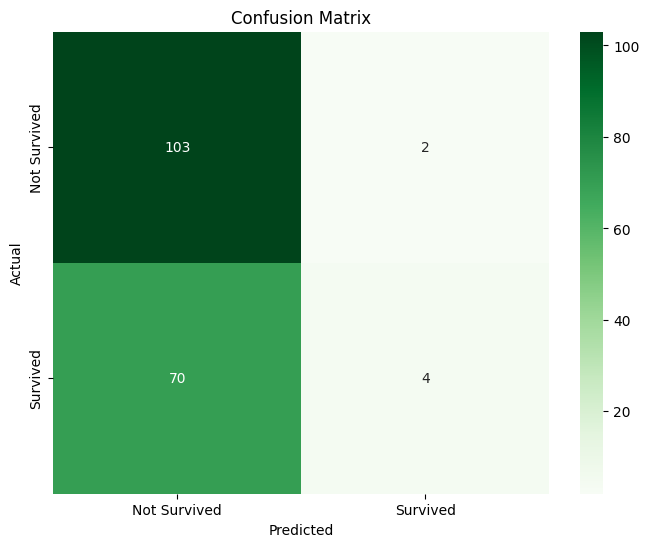

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

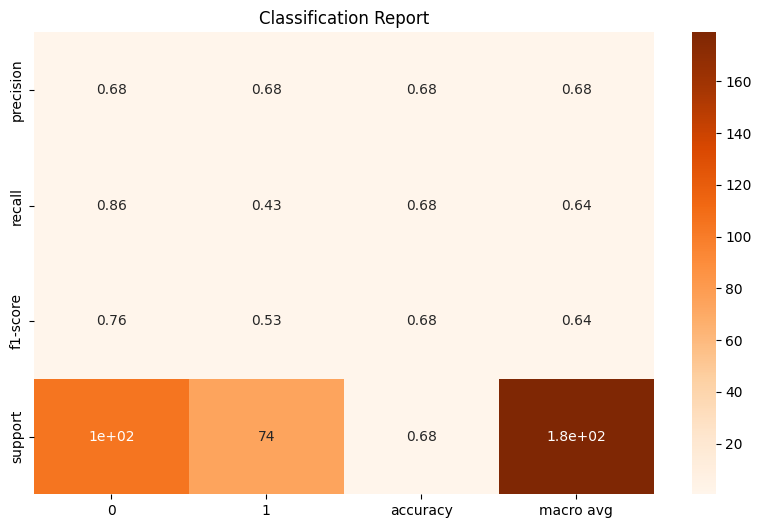

In [ ]:
# Visualize the classification report
report1 = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report1).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Oranges')
plt.title('Classification Report')
plt.show()

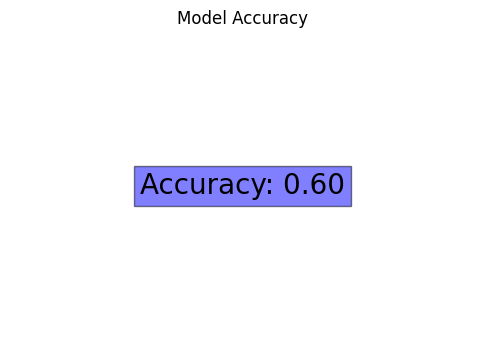

In [ ]:
# Display accuracy
accuracy1 = accuracy_score(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, f'Accuracy: {accuracy1:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=20, bbox=dict(facecolor='blue', alpha=0.5))
plt.axis('off')
plt.title('Model Accuracy')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Decision Tree')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Decision Tree
Accuracy: 0.6815642458100558
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       105
           1       0.63      0.55      0.59        74

    accuracy                           0.68       179
   macro avg       0.67      0.66      0.66       179
weighted avg       0.68      0.68      0.68       179

Confusion Matrix:
[[81 24]
 [33 41]]


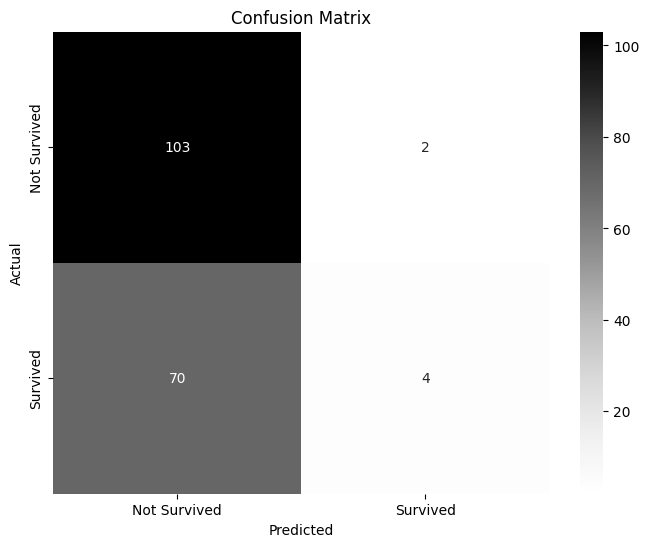

In [ ]:
# Generate the confusion matrix
conf_matrix3 = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Greys', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

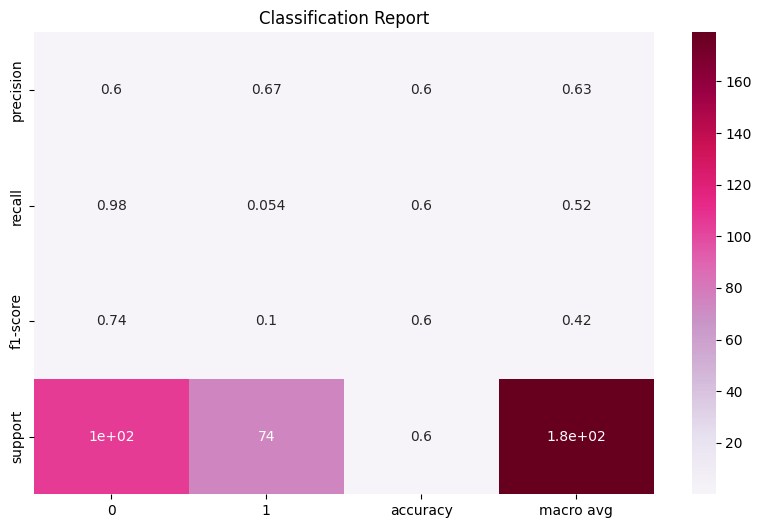

In [ ]:
# Generate the classification report
report4 = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report4).transpose()

# Plot the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='PuRd')
plt.title('Classification Report')
plt.show()

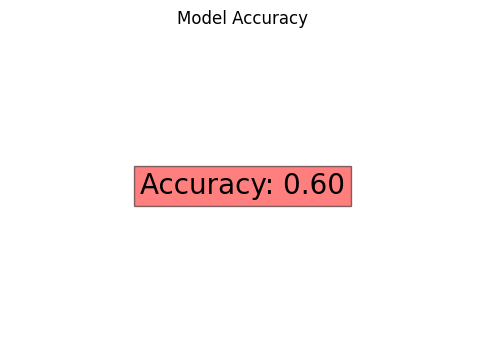

In [ ]:
# Calculate accuracy
accuracy4 = accuracy_score(y_test, y_pred)

# Display accuracy
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, f'Accuracy: {accuracy4:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=20, bbox=dict(facecolor='red', alpha=0.5))
plt.axis('off')
plt.title('Model Accuracy')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Random Forest')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Random Forest
Accuracy: 0.6480446927374302
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       105
           1       0.59      0.47      0.53        74

    accuracy                           0.65       179
   macro avg       0.63      0.62      0.62       179
weighted avg       0.64      0.65      0.64       179

Confusion Matrix:
[[81 24]
 [39 35]]


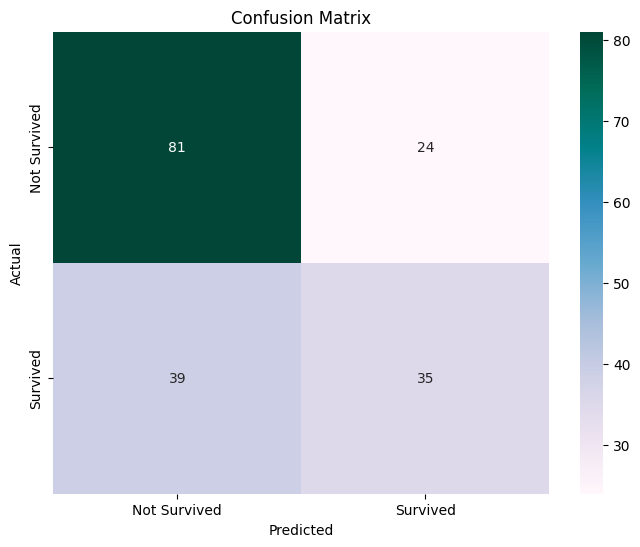

In [ ]:
# Generate the confusion matrix
conf_matrix5 = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='PuBuGn', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

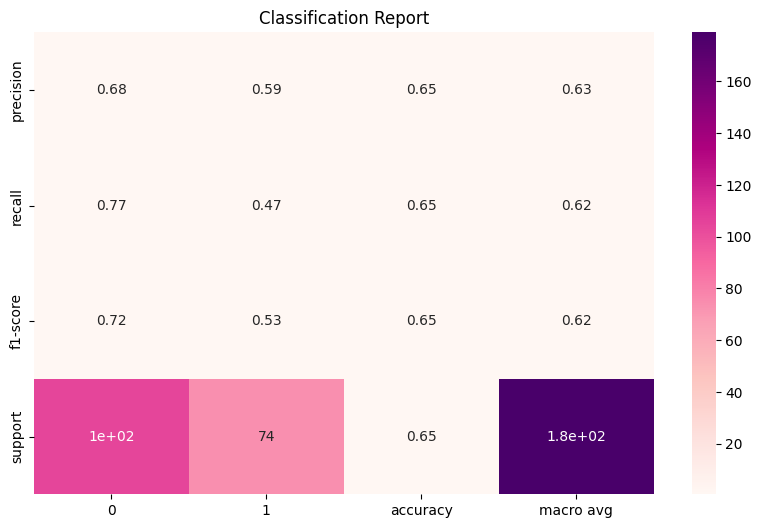

In [ ]:
# Generate the classification report
report5 = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report5).transpose()

# Plot the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='RdPu')
plt.title('Classification Report')
plt.show()

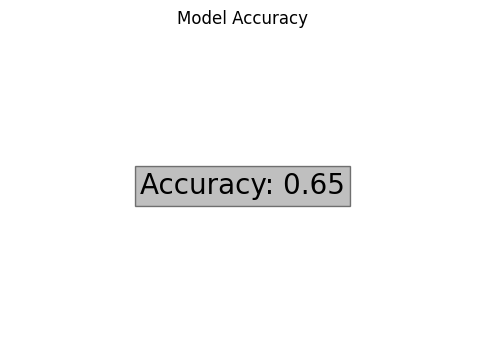

In [ ]:
# Calculate accuracy
accuracy5 = accuracy_score(y_test, y_pred)

# Display accuracy
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, f'Accuracy: {accuracy5:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=20, bbox=dict(facecolor='grey', alpha=0.5))
plt.axis('off')
plt.title('Model Accuracy')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and fit the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Naive Bayes')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Naive Bayes
Accuracy: 0.6871508379888268
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.90      0.77       105
           1       0.72      0.39      0.51        74

    accuracy                           0.69       179
   macro avg       0.70      0.64      0.64       179
weighted avg       0.70      0.69      0.66       179

Confusion Matrix:
[[94 11]
 [45 29]]


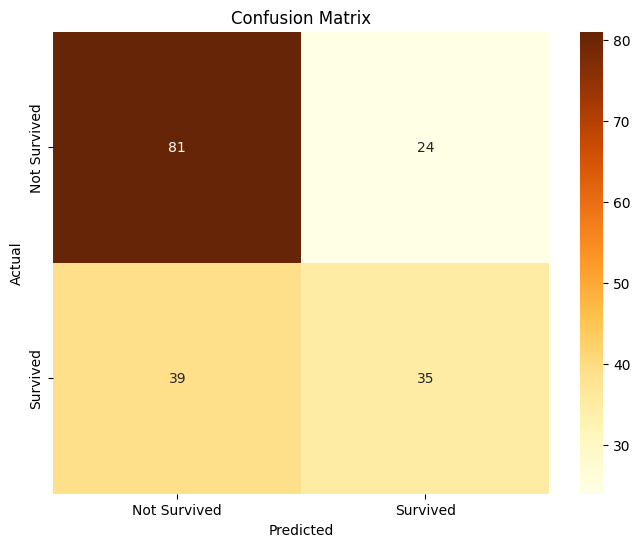

In [ ]:
# Visualize the confusion matrix
conf_matrix6 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix6, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

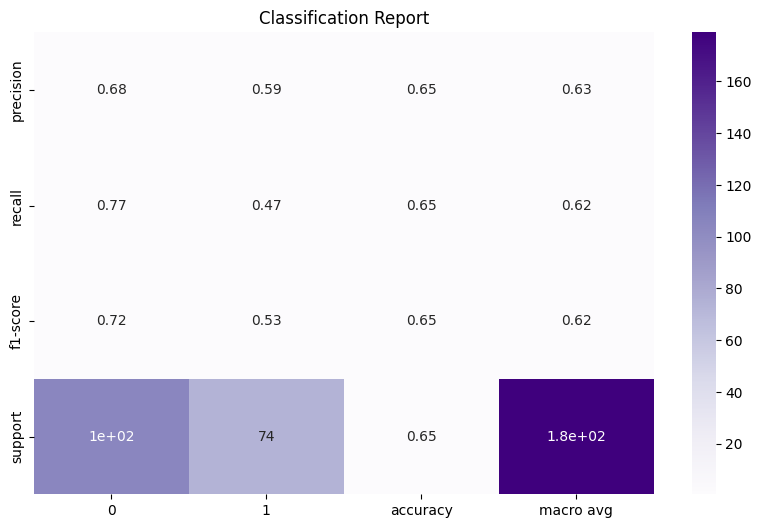

In [ ]:
# Visualize the classification report
report6 = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report6).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Purples')
plt.title('Classification Report')
plt.show()

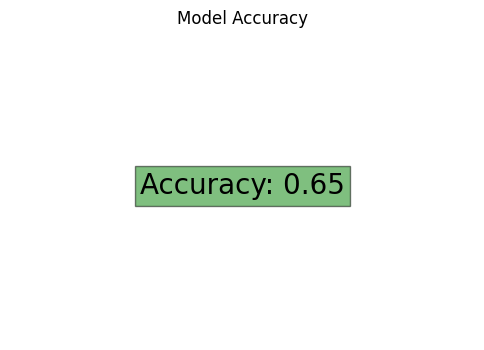

In [ ]:
# Display accuracy
accuracy6 = accuracy_score(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, f'Accuracy: {accuracy6:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=20, bbox=dict(facecolor='green', alpha=0.5))
plt.axis('off')
plt.title('Model Accuracy')
plt.show()